In [1]:
import numpy as np
import ast
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
#R = open('D:\Para procesar\Académica\Ciencias Físicas\Doctorado\Materias\Redes complejas\Trabajos_prácticos\Practica_computacional\mag_papers_166.txt', 'r') 
R = open('G:\Redes\mag_papers_166.txt', 'r') 

N = 999999
i = 0
doctype=[]
paper_conjuntos = []

# Con esta primera línea nos aseguramos de que los documentos que vamos a trabajar sean exclusivamente papers.

for line in R:
    paper=ast.literal_eval(line)
    try:
        doctype.append(paper['doc_type'])
        if paper['doc_type']=='Journal':
            paper_conjuntos.append(paper)
    except KeyError:
        pass
    i+=1
    if i==N:
        break
R.close()

paper_conjuntos_1 = []

# Con este código nos restringimos solo a aquellos papers que tienen keywords.

for line in range(len(paper_conjuntos)):
    #paper=ast.literal_eval(line)
    try:
        paper_conjuntos[line]['fos']
        paper_conjuntos_1.append(paper_conjuntos[line])
    except KeyError:
        pass
        
    i+=1
    if i==N:
        break

paper_conjuntos_2 = []

# Con esta línea nos restringimos a aquellos papers que tienen referencias.

for line in range(len(paper_conjuntos_1)):
    #paper=ast.literal_eval(line)
    try:
        paper_conjuntos[line]['references']
        paper_conjuntos_2.append(paper_conjuntos_1[line])
    except KeyError:
        pass
        
    i+=1
    if i==N:
        break        

# Esta última parte hace un raconto de las revistas para después hacer análisis de frecuencias.

journals=[]

for line in range(len(paper_conjuntos_2)):
    try:
        b=paper_conjuntos_2[line]['venue']
        journals.append(b)
    except KeyError:
        pass
    i+=1
    if i==N:
        break      
        
# Lo que podríamos hacer es restringirnos a aquellos papers que tienen dos, tres, cuatro, etc., citas. 
# Esto supone hacer un conteo de los id's y dejar solamente aquellos que tienen un id duplicado.
# Hay que armar una lista de ids, tomando tanto el id de cada paper como los ids de las referencias.

In [4]:
ides=[]

for line in range(len(paper_conjuntos_2)):
    try:
        b=paper_conjuntos_2[line]['id']
        ides.append(b)
        a=paper_conjuntos_2[line]['references']
        for tag in range(len(a)):
            ides.append(a[tag])
    except KeyError:
        pass
    i+=1
    if i==N:
        break 

In [6]:
print(len(ides))

558336


In [7]:
import collections
counter=collections.Counter(ides)

In [8]:
print(counter.values())

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 8, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 166, 1, 1, 1, 1, 1, 1, 1, 21, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 1, 2, 1, 1, 2, 1, 

In [9]:
(keys,values) = zip(*counter.items())

In [10]:
ides_limpios = []
for line in range(len(values)):
    if values[line]>1:
        ides_limpios.append(keys[line])

In [11]:
print(len(ides_limpios))

22705


In [12]:
paper_conjuntos_3 = []

# Con esta línea nos restringimos a aquellos papers que tienen referencias.

for line in range(len(paper_conjuntos_2)):
    #paper=ast.literal_eval(line)
    a=paper_conjuntos_2[line]['id']
    if a in ides_limpios:
        paper_conjuntos_3.append(paper_conjuntos_2[line])
  
    i+=1
    if i==N:
        break    

In [13]:
paper_conjuntos_4 = paper_conjuntos_3

# Con esta línea nos restringimos a aquellos papers que tienen referencias que aparecen más de una vez en el archivo general.
almacen = []
for line in range(len(paper_conjuntos_4)):
    try:
        a=paper_conjuntos_4[line]['references']
        for ref in a:
            if ref in ides_limpios:
                almacen.append(ref)
        paper_conjuntos_4[line]['references']=almacen
        almacen = []
    except KeyError:
        pass
    i+=1
    if i==N:
        break    

In [14]:
paper_conjuntos_3[5]['references']

['098a399b-af9c-412e-bd7a-fcf65c1a4a2e',
 '1bf2e603-8e0f-4bbe-9a69-4300832c0c0e',
 '286992be-44c8-4cac-8943-51a019df2593',
 '330ddec7-723e-4a0b-be96-fddeda2481c8',
 '6807675c-af2a-4244-b3e7-a2b929e925a9',
 '79d647c2-b786-4763-8cd0-fa7bc55a6976',
 '8752820a-e4f8-4151-9de5-79ddc13f2a45',
 'af993407-7ab5-48a6-a3f8-9cb27dbfa8ca',
 'b168ced5-ca68-4d42-baaf-65fa9a4df292',
 'b8f6c58b-705a-46e8-9642-b2cded1ec6ad',
 'e250a3ad-acc4-44e7-9aa7-bc3bcd3b80b4',
 'eb5ff952-414b-43f4-b0fe-a1795b7d89fd',
 'eb8ad794-2683-4a0e-b3ad-cf7df1d4fa87',
 'f0003061-3da1-43ca-a9cd-425e0490baf4',
 'f07b81f6-ed7f-4990-b246-5834b21213ea',
 'fdd3843b-6aa2-4a9d-bf64-d43c272800d0']

In [15]:
# Esto es para crear la red de citas. No tarda mucho en correr.

N = 20000
i = 0
G = nx.DiGraph() # Red Dirigida
for line in range(len(paper_conjuntos_4)):
    try:
        for cita in paper_conjuntos_4[line]['references']:                                                                                                                                                                                                                                                                                                                                                                       
            G.add_edge(paper_conjuntos_4[line]['id'],cita)
    except KeyError:
        G.add_node(paper_conjuntos_4[line]['id'])
    #nx.set_node_attributes(G, 'year', {paper['id']:paper['year']})
    nx.set_node_attributes(G, {paper_conjuntos_4[line]['id']:{'year':paper_conjuntos_4[line]['year']}})
    i+=1
    if i==N:
        break

In [7]:
l1 = [1, 2, 3, 4, 5]
l_siestan = [1, 3, 4]

l1 = list(set(l1).intersection(l_siestan))


In [8]:
paper_conjuntos_4 = paper_conjuntos_3.copy() #aca hay que crear una copia con el comando copy

# Con esta línea nos restringimos a aquellos papers que tienen referencias que aparecen más de una vez en el archivo general.
for line in range(len(paper_conjuntos_4)):
    try:
        l1 = list(set(paper_conjuntos_4[line]['references']).intersection(ides_limpios))
        paper_conjuntos_4[line]['references']=l1
    except KeyError:
        pass
    i+=1
    if i==N:

[1, 3, 4]

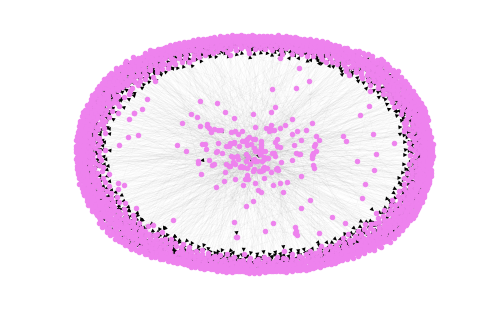

In [64]:
# Esto es obviamente para graficar la red. Cuidado porque tarda una banda.

options = {
'node_size': 20,
'width': 0.01,
}
nx.draw(G,node_color = 'violet', **options)
plt.show()

In [25]:
len(paper_conjuntos_3)

154

In [28]:
N = 154
i = 0
G = nx.DiGraph() # Red Dirigida
for line in range(len(paper_conjuntos_3)):
    try:
        for cita in paper_conjuntos_3[line]['references']:                                                                                                                                                                                                                                                                                                                                                                       
            G.add_edge(paper_conjuntos_3[line]['id'],cita)
    except KeyError:
        G.add_node(paper_conjuntos_3[line]['id'])
    #nx.set_node_attributes(G, 'year', {paper['id']:paper['year']})
    nx.set_node_attributes(G, {paper_conjuntos_3[line]['id']:{'year':paper_conjuntos_3[line]['year']}})
    i+=1
    if i==N:
        break

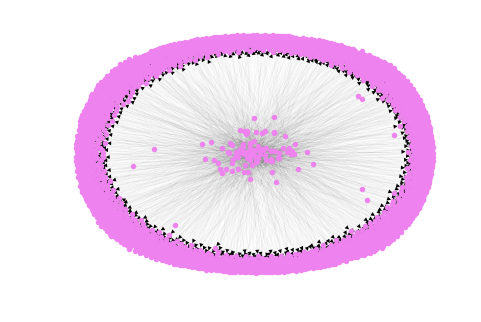

In [27]:
options = {
'node_size': 20,
'width': 0.01,
}
nx.draw(G,node_color = 'violet', **options)
plt.show()

In [13]:
l2=l1.copy()

In [14]:
print(l2)

[1, 3, 4]


In [11]:
l2

<function list.copy>

In [12]:
l1

[1, 3, 4]

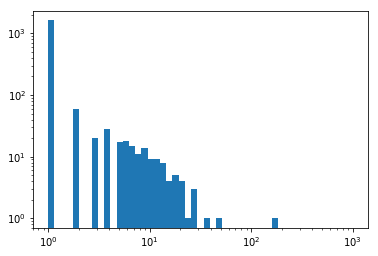

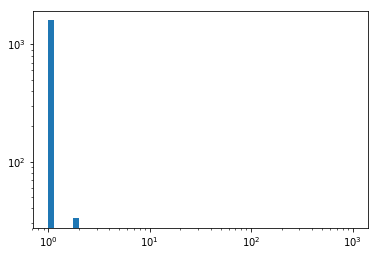

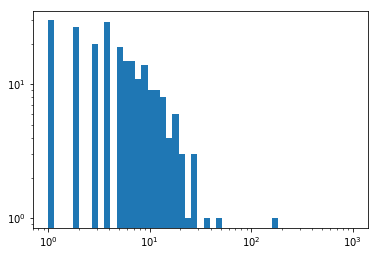

In [20]:
# Distribución de grado
grados_G = [gra for (nom,gra) in G.degree()]
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, density=False, log=True) 
plt.xscale('log')
#plt.yscale('log')
plt.show()

# Distribución de grado IN
grados_G = [gra for (nom,gra) in G.in_degree()] 
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, density=False, log=True) 
plt.xscale('log')
#plt.yscale('log')
plt.show()

# Distribución de grado OUT
grados_G = [gra for (nom,gra) in G.out_degree()]
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, density=False, log=True) 
plt.xscale('log')
#plt.yscale('log')
plt.show()